This code loads the BMS data into pandas dataframe with a DatetimeIndex to allow time slicing.  It also allows the crequency of the time series to be easily changed with the 'resample' function (for example grouping half hour time series to days or weeks).  

Set working directory

In [2]:
import os
import pandas as pd

# Change file_path as necessary
file_path = "C:\\Users\\Andrew\\Desktop\\Capstone Professional Project" 

os.chdir(file_path)

Load files

In [3]:
chiller = pd.read_csv('BMS-2017.csv', sep=',', encoding='ISO-8859-1')
boiler = pd.read_csv('boiler.csv',sep=',', encoding='ISO-8859-1')

Change the '?Timestamp' variables into datetime format

In [4]:
chiller.rename(columns={'?Timestamp.1': 'dt'}, inplace=True)
boiler.rename(columns={'?Timestamp': 'dt'}, inplace=True)

import datetime
def str_to_dt(series):
    return series.apply(lambda x:
        datetime.datetime.strptime(x[0:-5], '%d-%b-%y %I:%M:%S %p'))

chiller.dt = str_to_dt(chiller.dt) 
boiler.dt = str_to_dt(boiler.dt)

Create variables ('all_chillers_kw' & 'all_boilers_kw') which sum all usage

In [5]:
chiller_names = ['A','B1','B2','C']
kw_vars_ch = ['ML_PH/PH_Chiller_{}_CHW_kW (kW)'.format(
        i) for i in chiller_names]
all_chillers_kw = chiller[kw_vars_ch].apply(sum, axis=1)
all_chillers_kw.name = 'chillers_weekly_kw'
all_chillers_kw.index = pd.to_datetime(chiller.dt)

boiler_names = ['A','B','C']
kw_vars_boiler = ['ML_PH/PH_Boiler_{}_HHW_kW (kW)'.format(
        i) for i in boiler_names]
all_boilers_kw = boiler[kw_vars_boiler].apply(sum, axis=1)
all_boilers_kw.name = 'boilers_weekly_kw'
all_boilers_kw.index = pd.to_datetime(boiler.dt)

Calculate total consumption

In [6]:
chillers_hourly_17 = all_chillers_kw['2017-01-01':'2017-12-31'].resample('1H').sum()


chillers_weekly_17 = all_chillers_kw['2017-01-01':'2017-12-31'].resample('1W').sum()
boilers_weekly_17 = all_boilers_kw['2017-01-01':'2017-12-31'].resample('1W').sum()

all_kw_17 = pd.concat([chillers_weekly_17,boilers_weekly_17], axis=1)

Create stacked bar plot of weekly chiller and boiler consumption

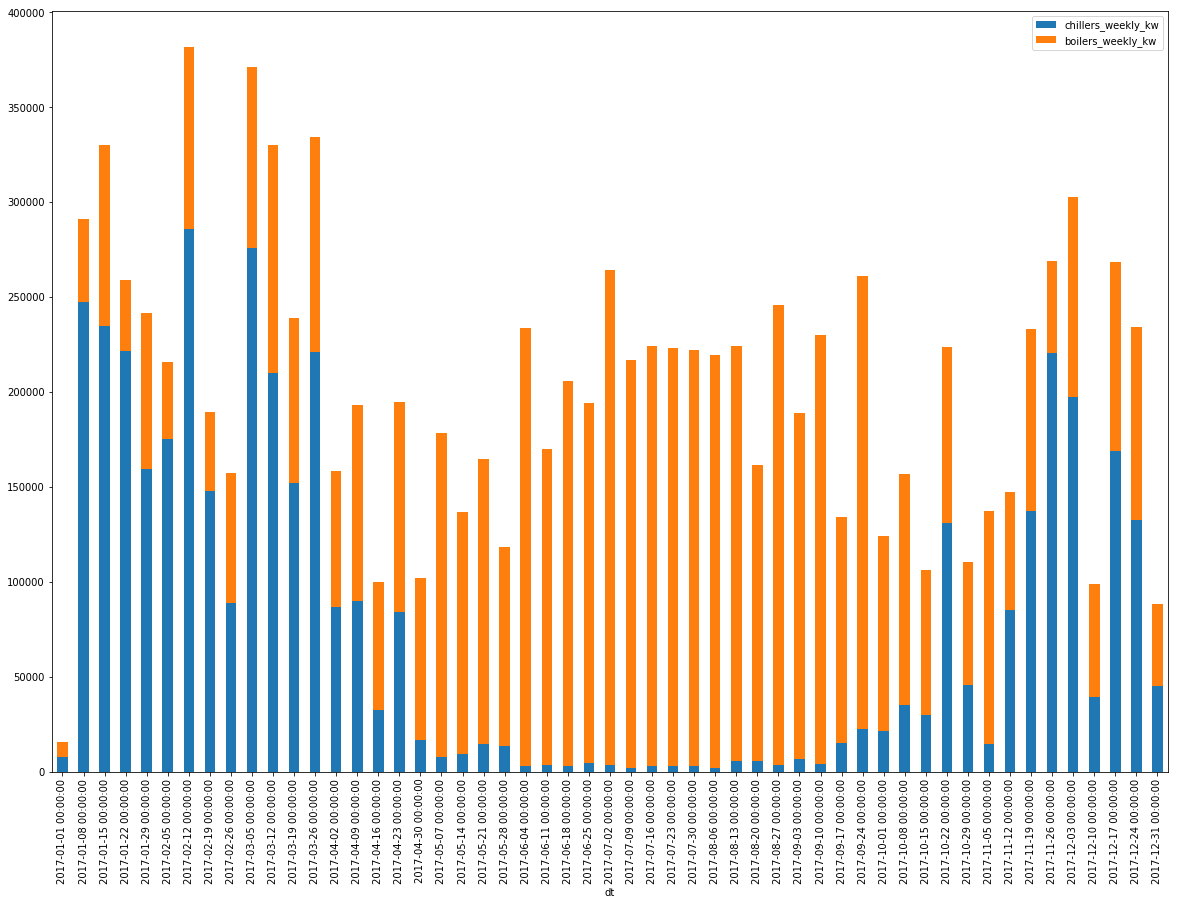

In [8]:
%matplotlib inline
all_kw_17.plot.bar(stacked=True, figsize=(20,14));       